In [14]:
import torch
import torch.nn as nn
import clip
from torchvision import models,transforms
from torch.autograd import Variable
from Dataset.HatefulMemeDataset import HatefulMemeDataset
from PIL import Image
from Models.Encoder import EncoderModel



In [9]:
if torch.cuda.is_available():
    device = 'cuda' 
    n_gpus = torch.cuda.device_count()
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

In [10]:
dataset = HatefulMemeDataset('./data','train') 
image = Image.open('./data/img/98724.png').convert("RGB")

In [17]:
device = 'cpu'
# model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device).eval() #faster-rcnn
model = EncoderModel(50)
imgTensor = transforms.ToTensor()(image).unsqueeze(0).to(device)

In [19]:
outputs = model(imgTensor)

In [22]:
print(outputs)

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0854],
          [0.0970, 0.0693, 0.0745,  ..., 0.0920, 0.0976, 0.0867],
          [0.2150, 0.2054, 0.1842,  ..., 0.1790, 0.1899, 0.1794],
          ...,
          [0.1840, 0.1888, 0.1738,  ..., 0.1738, 0.1738, 0.1582],
          [0.0519, 0.0133, 0.0085,  ..., 0.0085, 0.0085, 0.0272],
          [0.0531, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.5209, 0.4981, 0.5906,  ..., 0.6017, 0.6016, 0.6747],
          [0.5703, 0.5830, 0.6908,  ..., 0.7183, 0.7175, 0.7811],
          [0.6518, 0.6898, 0.8301,  ..., 0.8657, 0.8649, 0.8999],
          ...,
          [0.7365, 0.7977, 1.0137,  ..., 1.0137, 1.0137, 1.0630],
          [0.7013, 0.7629, 0.9727,  ..., 0.9727, 0.9727, 1.0261],
          [0.7165, 0.7827, 0.9125,  ..., 0.9125, 0.9125, 0.9295]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 

In [23]:
output = outputs[0]
print(output.shape)

torch.Size([1, 64, 400, 156])


In [90]:
import matplotlib.pyplot as plt

In [91]:
arr = []
for i in range(output['masks'].shape[0]):
    if output['scores'][i].item()>=0.7:
        arr.append(i)

arr

[0, 1, 2, 3]

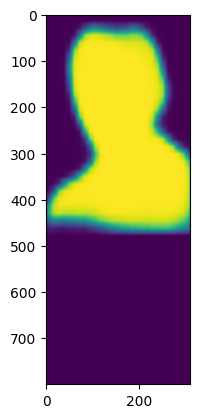

In [94]:
x = output['masks'][0]
x=x[0,:,:].detach().numpy()
plt.imshow(x)

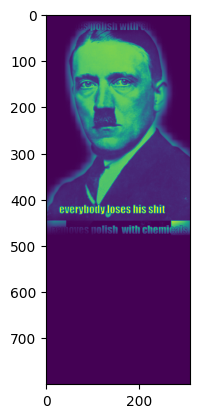

In [95]:
x = output['masks'][0]
x= (x*imgTensor[0])[0,:,:].detach().numpy()     #x[0,:,:].detach().numpy()
plt.imshow(x)

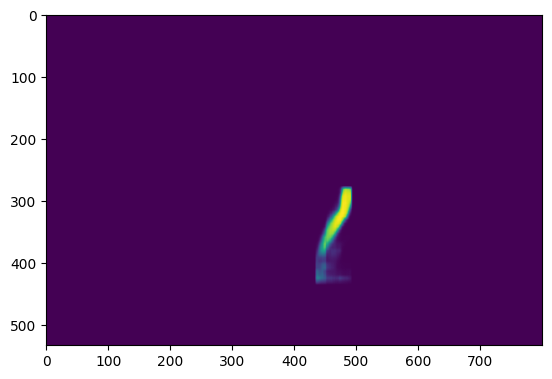

In [45]:
output['labels'][2]

In [34]:
# for i in range(output['masks'].shape[0]):
#     x = output['masks'][i]
#     x=x[0,:,:].detach().numpy()
#     plt.imshow(x)

In [ ]:
# create entities and 

In [1]:
import clevr_parser
import clevr_parser.utils as parser_utils

/opt/homebrew/Caskroom/miniforge/base/envs/mondep-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import networkx as nx

In [3]:
graph_parser = clevr_parser.Parser(backend='spacy', model='en_core_web_sm').get_backend(identifier='spacy')

embedder = clevr_parser.Embedder(backend='torch', parser=graph_parser).get_backend(identifier='torch')

TypeError: __init__() got an unexpected keyword argument 'has_spatial'

In [10]:
parser1 = parser()
embedder1 = embedder(parser)


Failed: Fixture "parser" called directly. Fixtures are not meant to be called directly,
but are created automatically when test functions request them as parameters.
See https://docs.pytest.org/en/stable/explanation/fixtures.html for more information about fixtures, and
https://docs.pytest.org/en/stable/deprecations.html#calling-fixtures-directly about how to update your code.